<a href="https://colab.research.google.com/github/dibkb/tensorflow-udemy/blob/main/CNN(transfer_learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Get data (10% of labels)
import zipfile

# Download data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-12-12 15:26:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.207, 172.253.117.207, 173.194.202.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   206MB/s    in 0.8s    

2023-12-12 15:26:56 (206 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [2]:
# How many images in each folder?
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/gr

# New section

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

SHAPE = (224,224)
BATCH_SIZE = 32
SEED = 42
train_dategen = ImageDataGenerator(rescale = 1/255.)
test_dategen = ImageDataGenerator(rescale = 1/255.)

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_data_ten = train_dategen.flow_from_directory(train_dir,
    target_size=SHAPE,
    color_mode='rgb',
    class_mode='categorical',
    seed=SEED,
    batch_size=BATCH_SIZE)

test_data = test_dategen.flow_from_directory(test_dir,
    target_size=SHAPE,
    color_mode='rgb',
    class_mode='categorical',
    seed=SEED,
    batch_size=BATCH_SIZE)

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [10]:
#Tensorboard calllbaclk
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [11]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [31]:
def create_model(url,num_classes):
  m = tf.keras.Sequential([
    hub.KerasLayer(url,trainable=False,input_shape =SHAPE+(3,),name = "feature_extractor_layer"),
    layers.Dense(num_classes,activation = "softmax",name='output_layer')
  ])
  return m


In [50]:
# Create model
# resnet_url = 'https://www.kaggle.com/models/tensorflow/resnet-50/frameworks/TensorFlow2/variations/classification/versions/1'
resnet_url = 'https://kaggle.com/models/google/resnet-v2/frameworks/TensorFlow2/variations/50-feature-vector/versions/1'
# resnet_url = 'https://www.kaggle.com/models/tensorflow/efficientnet/frameworks/TensorFlow2/variations/b0-classification/versions/1'
resnet_model = create_model(resnet_url, num_classes=train_data_ten.num_classes)
resnet_model.compile(loss="categorical_crossentropy",optimizer = "adam",metrics=["accuracy"])

In [51]:
# Fit the model
resnet_history = resnet_model.fit(train_data_ten,
                                  epochs=10,
                                  steps_per_epoch=len(train_data_ten),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="resnet50V2")])

Saving TensorBoard log files to: tensorflow_hub/resnet50V2/20231212-165315
Epoch 1/10
24/24 [==============================] - 16s 510ms/step - loss: 1.9033 - accuracy: 0.3520 - val_loss: 1.1964 - val_accuracy: 0.6212
Epoch 2/10
24/24 [==============================] - 11s 451ms/step - loss: 0.8742 - accuracy: 0.7600 - val_loss: 0.8397 - val_accuracy: 0.7368
Epoch 3/10
24/24 [==============================] - 11s 458ms/step - loss: 0.5979 - accuracy: 0.8280 - val_loss: 0.7461 - val_accuracy: 0.7520
Epoch 4/10
24/24 [==============================] - 11s 465ms/step - loss: 0.4643 - accuracy: 0.8853 - val_loss: 0.6996 - val_accuracy: 0.7728
Epoch 5/10
24/24 [==============================] - 11s 468ms/step - loss: 0.3689 - accuracy: 0.9160 - val_loss: 0.6787 - val_accuracy: 0.7864
Epoch 6/10
24/24 [==============================] - 10s 433ms/step - loss: 0.3013 - accuracy: 0.9480 - val_loss: 0.6555 - val_accuracy: 0.7924
Epoch 7/10
24/24 [==============================] - 11s 460ms/step 

In [67]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
def plot_history(model_history):
  df = pd.DataFrame(model_history.history)
  loss = df['loss']
  accuracy = df['accuracy']
  val_loss = df['val_loss']
  val_accuracy = df['val_accuracy']
  epochs = range(len(df['val_loss']))

    # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

   # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()


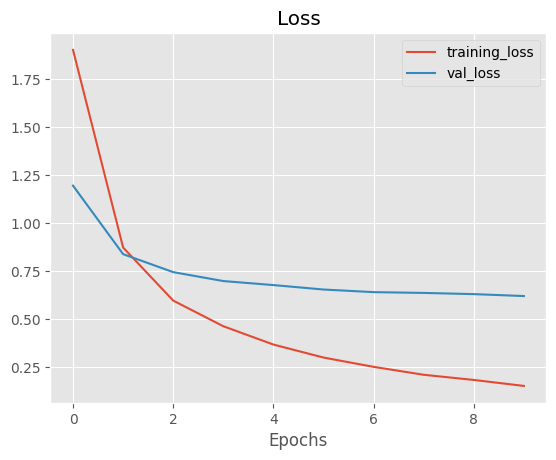

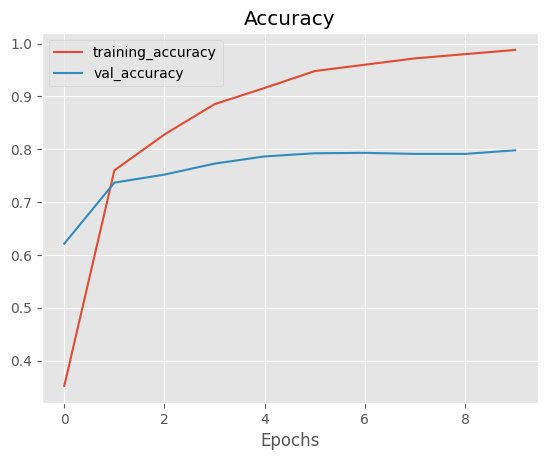

In [68]:
plot_history(resnet_history)

In [61]:
range(len(resnet_history.history["loss"]))


range(0, 10)